In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
channels = [1,2,3,4]
baseline_fraction = 0.3
ref_ch = 1
cfd_fraction = 0.4
infile = 'source_coincidence_test10.h5'
amplitudeLimits = {1:(0.1,0.65), 2:(0.1,0.65), 3:(0.1,0.65), 4:(0.1,0.65)}

smooth=False
kernel_sigma=1
kernel_width=5*kernel_sigma

In [ ]:
f = h5py.File(infile,'r')

num_triggers = len(f['ch1_samples'])
print(num_triggers)
# num_triggers = 10000
num_samples = len(f['ch1_samples'][0])
time_begin = f['ch1_trig_offset'][0]*1e9
time_end = f['ch1_horiz_scale'][0]*(num_samples-1)*1e9+time_begin
time = np.linspace(time_begin, time_end, num_samples)
sampling_freq = num_samples/(time_end-time_begin)

In [3]:
dataset_PPS = np.load(f'dataset.npz', allow_pickle=True)
samples_x, reference_y = dataset_PPS['X'], dataset_PPS['y']

#convert from sample time to ns
samples_x_ns = samples_x*156
reference_y_ns = reference_y*156

In [4]:
i = 1
sample = samples_x_ns[i]
t_truth = reference_y_ns[i]

t_ref: 5176.66057850763


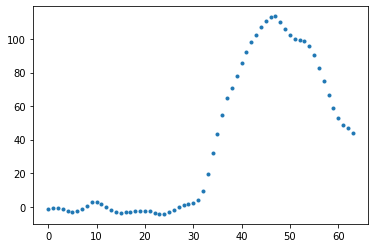

In [10]:
plt.plot(sample,marker='.',linestyle="None")
print('t_ref:',t_truth)

t_ref: 31.629215454306458


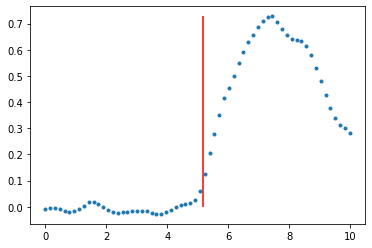

In [11]:
v, reft = dataset['X'], dataset['y']
#To plot trigger 'i':
t = np.linspace(0,len(v[0])*0.156,len(v[0]))
i = 1
plt.plot(t, v[i],marker='.',linestyle='None')
plt.vlines(reft[i]*0.156,0,np.max(v[i]), color='red')
print('t_ref:',reft[0])